# Setup

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd

import xgboost 

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

# [How to Develop Your First XGBoost Model in Python with scikit-learn](http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

## Get Data

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
           header=None)
data = np.array(data)

In [4]:
X_train = data[:, :-1]

In [5]:
y_train = data[:, -1]

## Model

In [6]:
mdl = xgboost.XGBClassifier()

In [7]:
mdl

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [8]:
mdl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [9]:
accuracy_training = sklearn.metrics.accuracy_score(mdl.predict(X_train), y_train)
accuracy_training

0.87239583333333337

In [10]:
sklearn.model_selection.cross_val_score(mdl, X_train, y_train, cv=4)

array([ 0.765625  ,  0.71354167,  0.74479167,  0.80729167])

# Iris

In [2]:
data = sklearn.datasets.load_iris()

In [3]:
X_train = data.data

In [4]:
y_train = data.target

In [5]:
mdl = xgboost.XGBClassifier()

In [6]:
mdl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [7]:
accuracy_training = sklearn.metrics.accuracy_score(mdl.predict(X_train), y_train)
accuracy_training

1.0

In [8]:
sklearn.model_selection.cross_val_score(mdl, X_train, y_train, cv=4)

array([ 0.97435897,  0.94871795,  0.94444444,  0.97222222])

## Plot tree

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

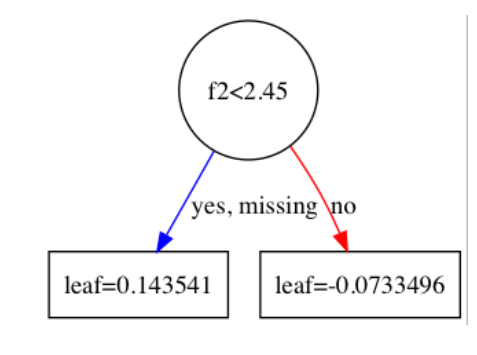

In [17]:
mdl.fit(X_train, y_train)
xgboost.plot_tree(mdl)

# [Mini course](http://machinelearningmastery.com/xgboost-python-mini-course/)

## Early stopping

In [20]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
    header=None)
data = np.array(data)

In [21]:
X = data[:, :-1]

In [22]:
y = data[:, -1]

In [23]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.3)

In [24]:
mdl = xgboost.XGBClassifier()

In [25]:
eval_set = [(X_test, y_test),]

In [26]:
mdl.fit(X_train,
        y_train,
        early_stopping_rounds=10,
        eval_metric="logloss",
        eval_set=eval_set,
        verbose=True)

[0]	validation_0-logloss:0.66495
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.64298
[2]	validation_0-logloss:0.625548
[3]	validation_0-logloss:0.606116
[4]	validation_0-logloss:0.590909
[5]	validation_0-logloss:0.578842
[6]	validation_0-logloss:0.568352
[7]	validation_0-logloss:0.558394
[8]	validation_0-logloss:0.550867
[9]	validation_0-logloss:0.545305
[10]	validation_0-logloss:0.538209
[11]	validation_0-logloss:0.531295
[12]	validation_0-logloss:0.52748
[13]	validation_0-logloss:0.521525
[14]	validation_0-logloss:0.517919
[15]	validation_0-logloss:0.513787
[16]	validation_0-logloss:0.509264
[17]	validation_0-logloss:0.507352
[18]	validation_0-logloss:0.503227
[19]	validation_0-logloss:0.499165
[20]	validation_0-logloss:0.496276
[21]	validation_0-logloss:0.494249
[22]	validation_0-logloss:0.492994
[23]	validation_0-logloss:0.49093
[24]	validation_0-logloss:0.489787
[25]	validation_0-logloss:0.488004
[26]	validation_0-logloss:0.48863
[2

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [31]:
y_pred = mdl.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.76%


## Feature Importance

In [32]:
mdl.feature_importances_

array([ 0.07558139,  0.22383721,  0.0872093 ,  0.05523256,  0.06395349,
        0.20639534,  0.15116279,  0.13662791], dtype=float32)

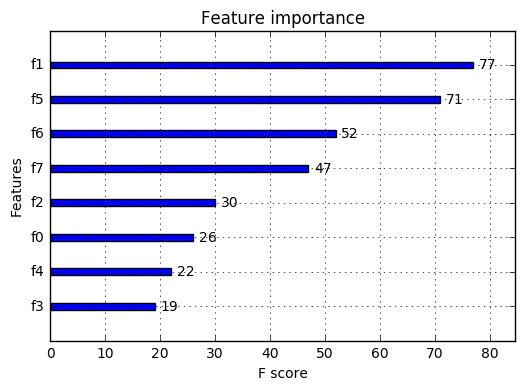

In [38]:
xgboost.plot_importance(mdl)

## How to Configure Gradient Boosting

In [40]:
??xgboost.XGBClassifier()

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
The depth of trees (tree_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
The depth of trees (tree_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

## Hyperparameter Tuning

In [41]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [46]:
kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = sklearn.model_selection.GridSearchCV(mdl, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.9s finished


The parameters to consider tuning are:

- The number and size of trees (n_estimators and max_depth).
- The learning rate and number of trees (learning_rate and n_estimators).
- The row and column subsampling rates (subsample, colsample_bytree and colsample_bylevel).

In [49]:
result.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# References
- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py
- http://machinelearningmastery.com/xgboost-python-mini-course/
- https://github.com/yang-zhang/xgboost/tree/master/demo
- https://github.com/dmlc/xgboost/tree/master/demo/kaggle-higgs
- [Owen Zhang Slides](https://www.slideshare.net/odsc/owen-zhangopen-sourcetoolsanddscompetitions1/12)